In [3]:
import sys
import os

# Set root path relative to this notebook (notebooks/run_model.ipynb)
project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

import numpy as np
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
%matplotlib inline

from model.bayesian_mmm import build_mmm_model

In [4]:
# Load the saved posterior trace
trace = az.from_netcdf(os.path.join(project_root,"trace/trace.nc"))

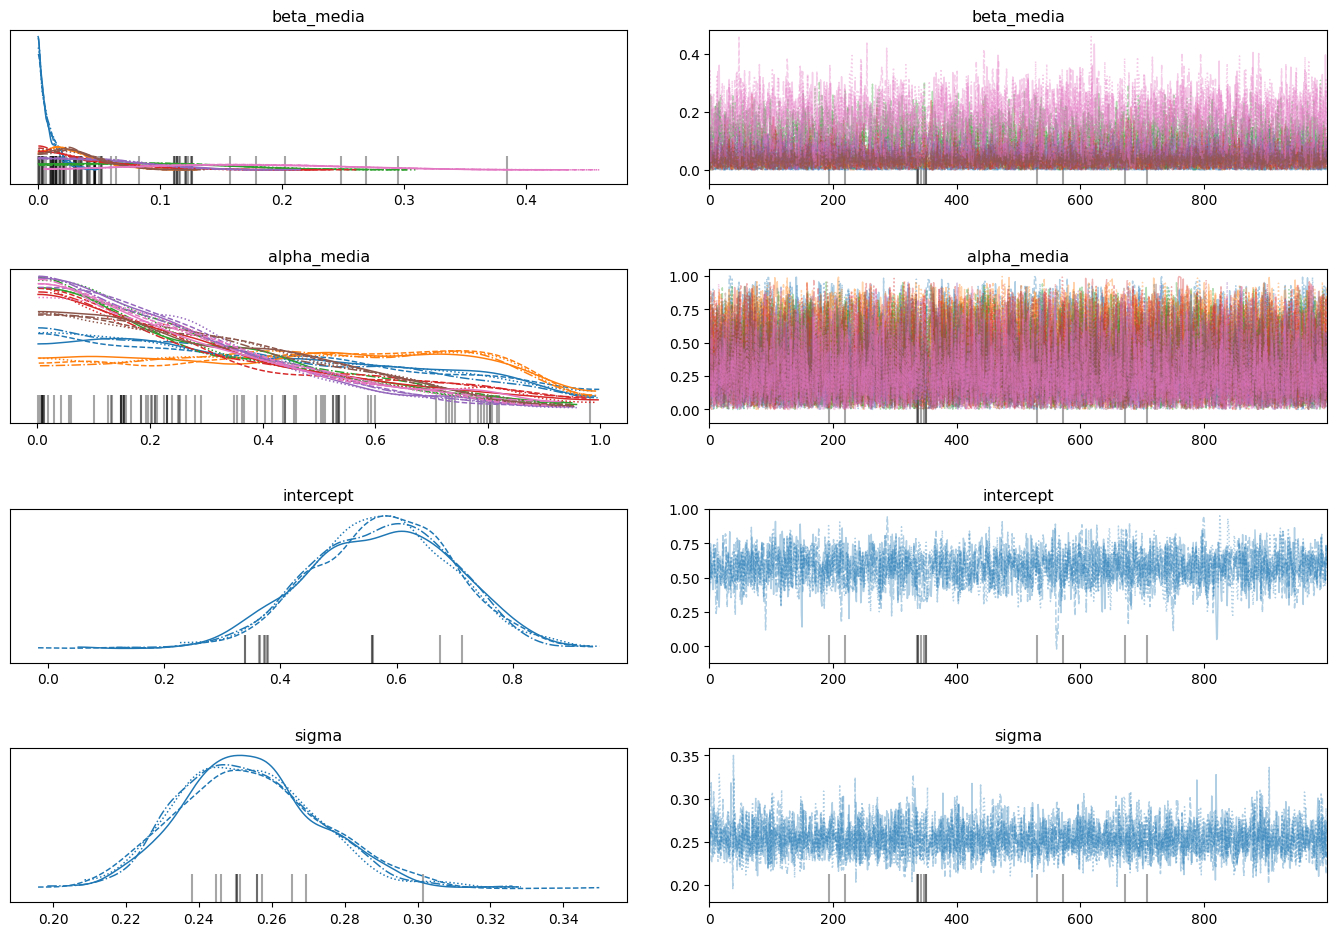

In [13]:
# Create trace plot
az.plot_trace(trace, var_names=["beta_media", "alpha_media", "intercept", "sigma"], figsize=(14, 10))

# Add spacing between subplots
plt.tight_layout(pad=3.0)  # Increase padding between plots
plt.show()

array([[<Axes: title={'center': 'beta_media\n0'}>,
        <Axes: title={'center': 'beta_media\n1'}>,
        <Axes: title={'center': 'beta_media\n2'}>,
        <Axes: title={'center': 'beta_media\n3'}>],
       [<Axes: title={'center': 'beta_media\n4'}>,
        <Axes: title={'center': 'beta_media\n5'}>,
        <Axes: title={'center': 'beta_media\n6'}>,
        <Axes: title={'center': 'alpha_media\n0'}>],
       [<Axes: title={'center': 'alpha_media\n1'}>,
        <Axes: title={'center': 'alpha_media\n2'}>,
        <Axes: title={'center': 'alpha_media\n3'}>,
        <Axes: title={'center': 'alpha_media\n4'}>],
       [<Axes: title={'center': 'alpha_media\n5'}>,
        <Axes: title={'center': 'alpha_media\n6'}>, <Axes: >, <Axes: >]],
      dtype=object)

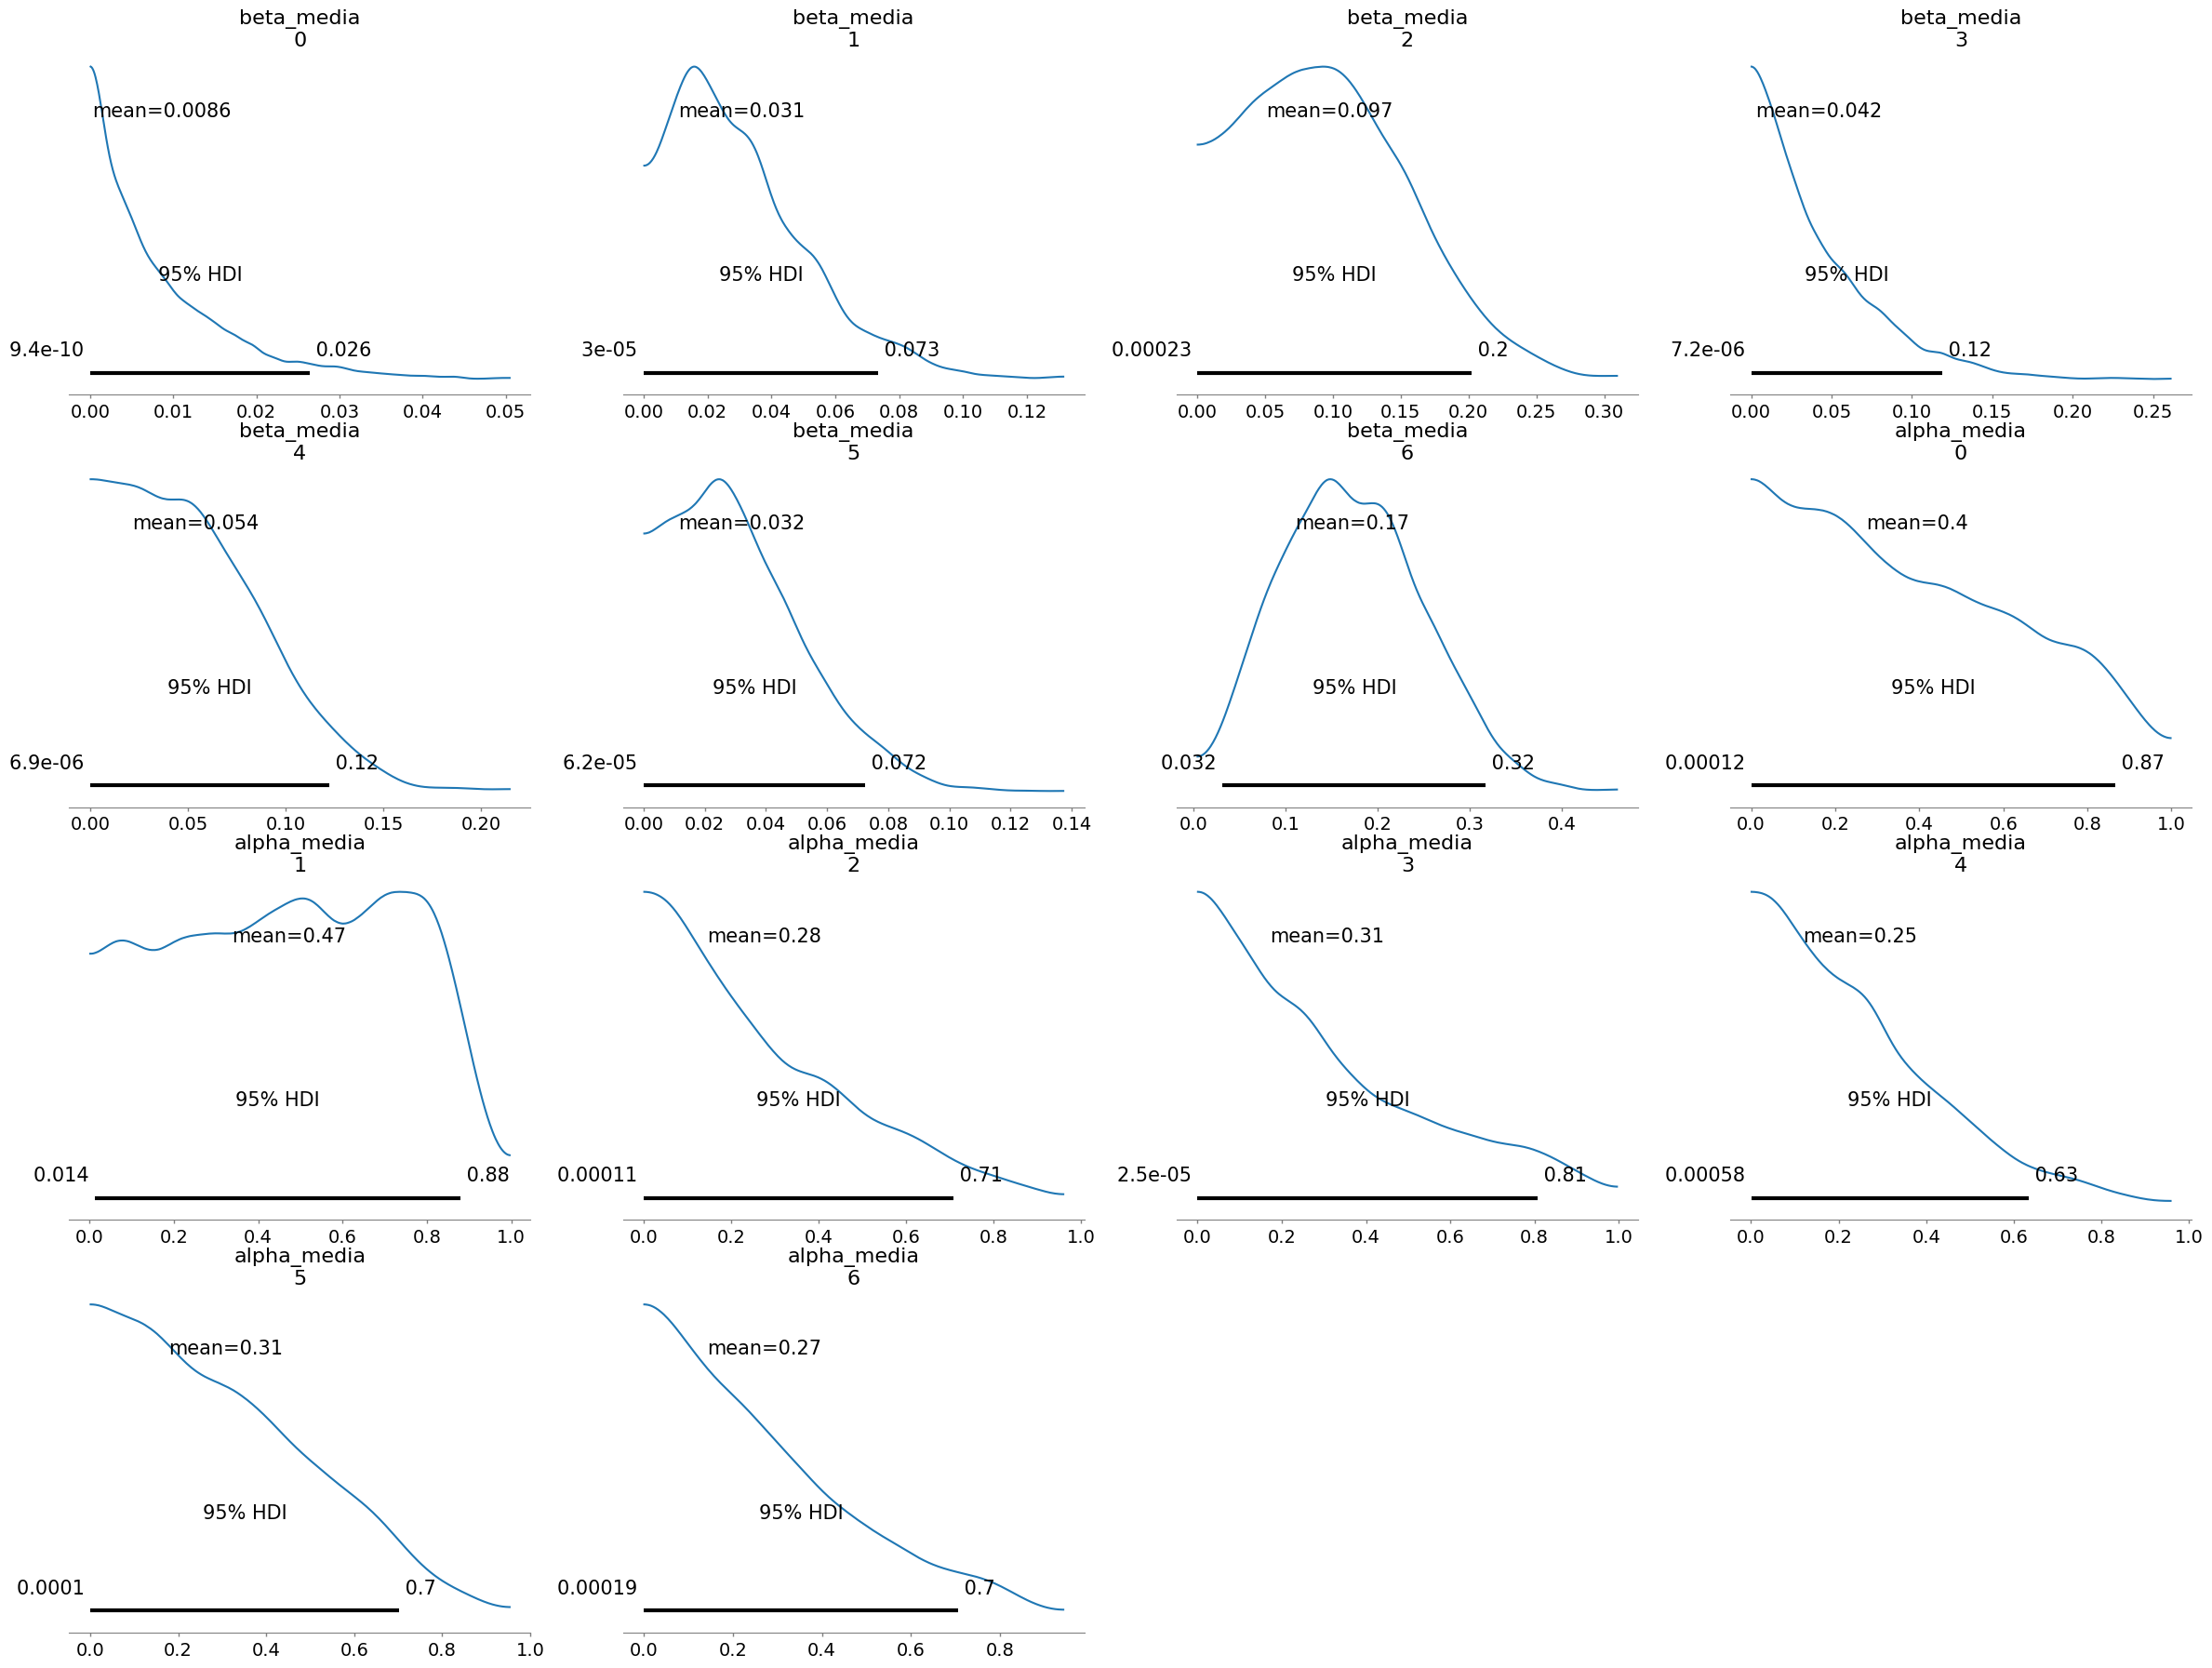

In [16]:
az.plot_posterior(trace, var_names=["beta_media", "alpha_media"], hdi_prob=0.95)

In [5]:
summary = az.summary(trace, var_names=["beta_media", "alpha_media", "intercept", "sigma"])

summary.to_csv(os.path.join(project_root,"output_files/mmm_summary.csv"))

<xarray.Dataset> Size: 256B
Dimensions:            (beta_media_dim_0: 7, alpha_media_dim_0: 7)
Coordinates:
  * beta_media_dim_0   (beta_media_dim_0) int64 56B 0 1 2 3 4 5 6
  * alpha_media_dim_0  (alpha_media_dim_0) int64 56B 0 1 2 3 4 5 6
Data variables:
    intercept          float64 8B 1.002
    beta_trend         float64 8B 1.0
    beta_peak          float64 8B 1.001
    beta_media         (beta_media_dim_0) float64 56B 1.0 1.002 ... 1.001 1.0
    alpha_media        (alpha_media_dim_0) float64 56B 1.0 1.0 ... 1.0 1.001
    sigma              float64 8B 1.001

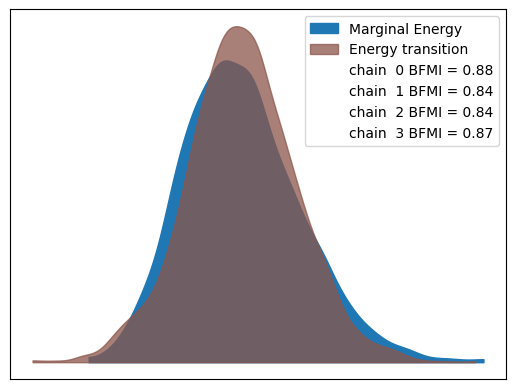

In [15]:
az.plot_energy(trace)  # NUTS sampler energy diagnostic
az.rhat(trace)         # R-hat values (should be ~1.0)